In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS


In [4]:
df = pd.read_csv('../data_cleaning/cleaned_ba_data.csv', index_col=0)
df.date = pd.to_datetime(df['date'], format='mixed')

In [10]:
df.head()

,reviews,country,date,stars,verified,corpus
0,✅ trip verified | easy check in a t5. galleri...,united kingdom,2023-08-13,8.0,True,easy check gallery south north lounge packed a...
1,"not verified | flight delayed by an hour, it ...",united states,2023-08-12,2.0,False,flight delayed hour happens biggie u change ga...
2,not verified | the staff are very rude and not...,united kingdom,2023-08-11,2.0,False,staff rude trained properly exception made chi...
3,✅ trip verified | good domestic flight operat...,united kingdom,2023-08-08,10.0,True,good domestic flight operated ba cityflyer gro...
4,not verified | failed at all basic travel fund...,canada,2023-08-08,1.0,False,failed basic travel fundamental flight delayed...


In [13]:
# AVERAGE RATING FOR THE AIRLINE
df.stars.mean()

4.762593932646813

Text(0.5, 0.98, 'Total number of reviews with each rating')

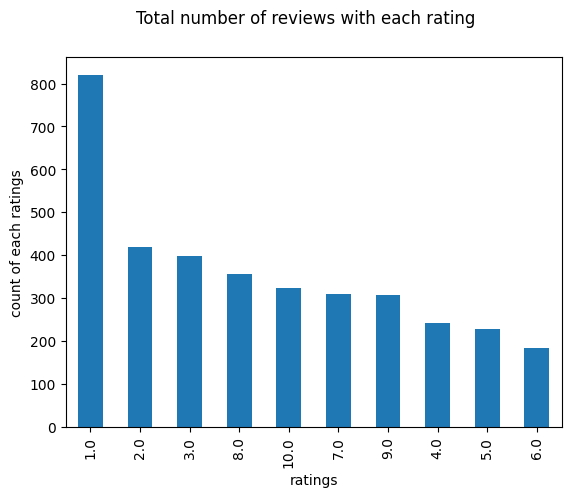

In [27]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('count of each ratings')
plt.suptitle('Total number of reviews with each rating')

In [45]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings = df_ratings.reset_index()

In [54]:
df_ratings

,stars,count
0,1.0,820
1,2.0,420
2,3.0,398
3,8.0,357
4,10.0,324
5,7.0,309
6,9.0,308
7,4.0,243
8,5.0,229
9,6.0,185


In [63]:
#  CONVERT RATINGS TP PERCENTAGE, ROUNDED TO 2 AND MAKE A NEW DATAFRAME
pct_value = (df_ratings['count'].values / df_ratings['count'].sum() *100).tolist()
pct_value = [round(x, 2) for x in pct_value]
df_ratings['pct_values'] = pct_value

In [69]:
df_ratings

,stars,count,pct_values
0,1.0,820,22.82
1,2.0,420,11.69
2,3.0,398,11.08
3,8.0,357,9.94
4,10.0,324,9.02
5,7.0,309,8.60
6,9.0,308,8.57
7,4.0,243,6.76
8,5.0,229,6.37
9,6.0,185,5.15


Text(0.5, 1.0, 'percentage value of ratings')

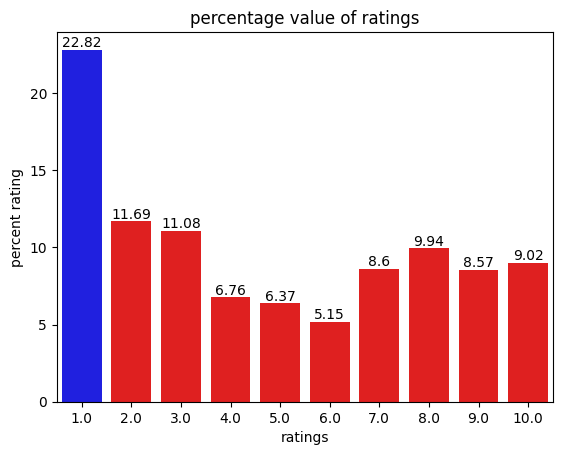

In [85]:
clrs = ['blue' if (x == max(df_ratings.pct_values)) else 'red' for x in df_ratings.pct_values]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.pct_values, data=df_ratings, palette=clrs, errwidth=0 )

ax.bar_label(ax.containers[0])
ax.set_ylabel('percent rating')
ax.set_xlabel('ratings')
ax.set_title('percentage value of ratings')

In [88]:
print(f"{df.country.nunique()} unique countries")

71 unique countries


In [95]:
df_country = pd.DataFrame(df.country.value_counts()).reset_index()

In [96]:
df_country

,country,count
0,united kingdom,2262
1,united states,394
2,australia,155
3,canada,111
4,germany,60
...,...,...
66,costa rica,1
67,cayman islands,1
68,panama,1
69,saint kitts and nevis,1


country
united kingdom    2262
united states      394
australia          155
canada             111
germany             60
Name: count, dtype: int64